In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('datasetEn.csv') #read the csv and convert to df 
df

,id_record,temperature,relative_humidity,light,CO2,absolute_humidity,occupation
0,20019,20.513802,29.911067,1012.993709,783.551679,0.004371,0
1,29077,21.347758,18.760759,165.049937,477.166606,0.002899,0
2,17474,20.712988,33.721442,0.000000,517.784597,0.004799,0
3,26163,20.138632,34.154604,149.785610,1515.136696,0.004924,0
4,16665,22.761815,30.479519,608.948933,1012.253115,0.004944,1
...,...,...,...,...,...,...,...
11995,30246,21.723261,27.503064,399.628688,1071.844655,0.004432,1
11996,24866,19.865724,19.443050,0.000000,458.272078,0.003306,0
11997,26543,21.416242,25.287051,279.024395,445.316161,0.003720,0
11998,23871,19.653193,25.579196,0.000000,913.788844,0.003924,0


In [3]:
df[['id_record','occupation']] #show id_record and occupation columns

,id_record,occupation
0,20019,0
1,29077,0
2,17474,0
3,26163,0
4,16665,1
...,...,...
11995,30246,1
11996,24866,0
11997,26543,0
11998,23871,0


In [4]:
df[df.isnull().any(axis=1)] #show columns with NaN valors

,id_record,temperature,relative_humidity,light,CO2,absolute_humidity,occupation
701,22735,23.414789,25.120318,NaN,609.072325,0.004631,1
1258,30552,21.545979,19.593613,NaN,454.220036,0.003050,0
3380,13646,NaN,23.226059,0.0,814.693219,0.004292,1
7152,23453,24.045047,24.862221,NaN,680.880185,0.004181,1
9533,26869,NaN,24.362553,NaN,1220.711533,0.004818,1


In [5]:
df = df.dropna() #drop NaN valors from the df
df

,id_record,temperature,relative_humidity,light,CO2,absolute_humidity,occupation
0,20019,20.513802,29.911067,1012.993709,783.551679,0.004371,0
1,29077,21.347758,18.760759,165.049937,477.166606,0.002899,0
2,17474,20.712988,33.721442,0.000000,517.784597,0.004799,0
3,26163,20.138632,34.154604,149.785610,1515.136696,0.004924,0
4,16665,22.761815,30.479519,608.948933,1012.253115,0.004944,1
...,...,...,...,...,...,...,...
11995,30246,21.723261,27.503064,399.628688,1071.844655,0.004432,1
11996,24866,19.865724,19.443050,0.000000,458.272078,0.003306,0
11997,26543,21.416242,25.287051,279.024395,445.316161,0.003720,0
11998,23871,19.653193,25.579196,0.000000,913.788844,0.003924,0


In [6]:
columns = list(df.columns)[1:-1] #select just the columns that serve for the ML model (not id)
#my_columns = ['temperature', 'relative_humidity', 'light', 'CO2', 'absolute_humidity']

In [7]:
X = df[columns] #asign df with the columns except 'id_record'
X

,temperature,relative_humidity,light,CO2,absolute_humidity
0,20.513802,29.911067,1012.993709,783.551679,0.004371
1,21.347758,18.760759,165.049937,477.166606,0.002899
2,20.712988,33.721442,0.000000,517.784597,0.004799
3,20.138632,34.154604,149.785610,1515.136696,0.004924
4,22.761815,30.479519,608.948933,1012.253115,0.004944
...,...,...,...,...,...
11995,21.723261,27.503064,399.628688,1071.844655,0.004432
11996,19.865724,19.443050,0.000000,458.272078,0.003306
11997,21.416242,25.287051,279.024395,445.316161,0.003720
11998,19.653193,25.579196,0.000000,913.788844,0.003924


In [13]:
y = df['occupation'] #select the target 'occupation'
y

0        0
1        0
2        0
3        0
4        1
        ..
11995    1
11996    0
11997    0
11998    0
11999    0
Name: occupation, Length: 11995, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split # split the data in training and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
#Show the shape of X_train
X_train.shape 

(9596, 5)

In [16]:
#Create of the RF model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42) 

In [17]:
#Train the model
model.fit(X_train, y_train) 

RandomForestClassifier(random_state=42)

In [18]:
#Get the prediction target
y_pred = model.predict(X_test) 
y_pred

array([0, 0, 0, ..., 0, 1, 0], shape=(2399,))

In [19]:
#Some metrics of the model
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score 
print(accuracy_score(y_test, y_pred)) #accuracy score
print(roc_auc_score(y_test, y_pred)) #roc auc score
print(confusion_matrix(y_test, y_pred))

0.940808670279283
0.9142263575050461
[[1782   68]
 [  74  475]]


<Axes: >

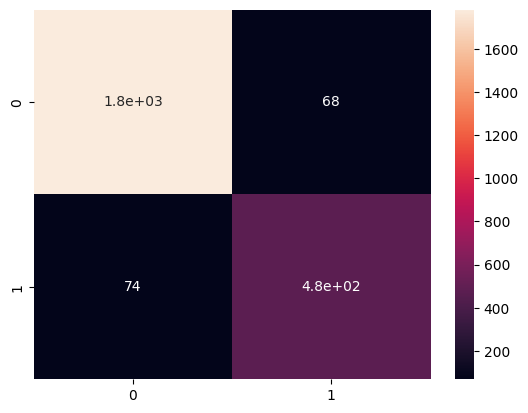

In [20]:
#Heatmap of the confusion matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True) 

In [21]:
#Use cross-validation with 5 folds and gridSearch to search the best parameters for a model
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import GridSearchCV

In [22]:
#Generate the model
clf = RandomForestClassifier(random_state=42) 
parameter_grid = {'n_estimators': [140,150,160], 
                  'max_depth': [None, 2, 4, 6]
                  }

#We could put another parameters in parameter_grid in order to find a model with better score but the complexity will increase and therefore the computational load

In [23]:
# Crossvalidation 5-Folds
cross_validation = StratifiedKFold(n_splits=5, random_state=42, shuffle=True) 

In [24]:
#Gridsearch 
grid_search = GridSearchCV(clf,
                           param_grid=parameter_grid,
                           cv=cross_validation,
                           n_jobs = -1,
                           verbose=3)

In [25]:
grid_search.fit(X_train, y_train) 
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best score: 0.9348688553065833
Best parameters: {'max_depth': None, 'n_estimators': 150}


In [26]:
#clf will be the model with the best estimation among the parameters in the parameter_grid
clf = grid_search.best_estimator_ 
clf

RandomForestClassifier(n_estimators=150, random_state=42)

# dataset_unclassified

In [27]:
df = pd.read_csv('dataset_unclassified.csv') #the ML model for these exercise will be the 'clf' , found with GridSearch and with cross validation
df

,id_record,temperature,relative_humidity,light,CO2,absolute_humidity
0,17761,22.561779,29.744439,904.055524,806.036356,0.004797
1,25264,22.869926,33.894069,107.935028,1549.241728,0.006084
2,30252,20.486633,35.911496,57.554649,488.975145,0.005515
3,19288,20.305429,30.604171,0.000000,532.881435,0.004174
4,15273,21.012591,31.802713,0.000000,552.741722,0.004752
...,...,...,...,...,...,...
4995,23496,20.766583,33.914831,12.513803,680.039428,0.004756
4996,28084,20.988485,26.992550,0.000000,553.375764,0.004267
4997,21617,22.921429,38.810614,668.464032,1819.283814,0.006187
4998,24315,21.574549,37.346533,280.350097,1666.799807,0.005877


In [28]:
df[df.isnull().any(axis=1)]

,id_record,temperature,relative_humidity,light,CO2,absolute_humidity


In [30]:
IDs, X_unclassified = df[df.columns[0]], df[df.columns[1:]]

In [31]:
IDs

0       17761
1       25264
2       30252
3       19288
4       15273
        ...  
4995    23496
4996    28084
4997    21617
4998    24315
4999    20484
Name: id_record, Length: 5000, dtype: int64

In [32]:
X_unclassified.head()

,temperature,relative_humidity,light,CO2,absolute_humidity
0,22.561779,29.744439,904.055524,806.036356,0.004797
1,22.869926,33.894069,107.935028,1549.241728,0.006084
2,20.486633,35.911496,57.554649,488.975145,0.005515
3,20.305429,30.604171,0.000000,532.881435,0.004174
4,21.012591,31.802713,0.000000,552.741722,0.004752


In [33]:
y_pred = clf.predict(X_unclassified)
y_pred

array([1, 1, 0, ..., 1, 1, 0], shape=(5000,))

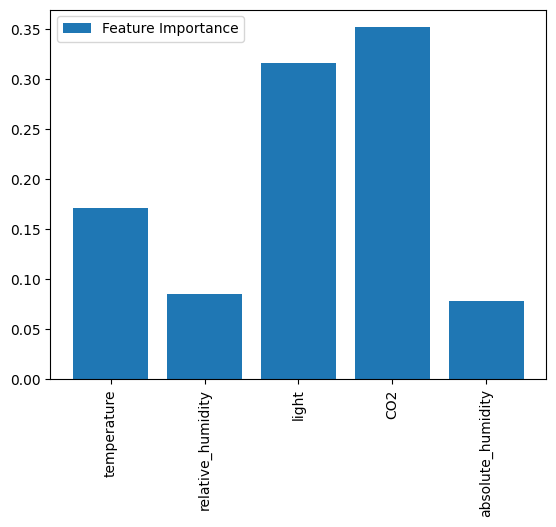

In [36]:
#Graphic of the importances of each feature in the prediction
import matplotlib.pyplot as plt

importances = clf.feature_importances_
feature_names = df.columns[1:]

bars = plt.bar(feature_names, importances)

# Añadir leyenda con etiquetas
plt.legend([bars], ['Feature Importance'])  # Esto asigna una etiqueta a las barras

plt.xticks(rotation='vertical')
plt.show()

In [37]:
#Generate/create the csv file 'classification_estimated.csv'
s = 'id_record, occupation\n' 
for ID, pred in zip(IDs, y_pred):
    s += '%s,%s\n' % (int(ID), pred)

with open('classification_estimated.csv', 'w') as f:
    f.write(s[:-1])